In [9]:
import pandas as pd
tweets_all_df=pd.read_csv("/content/data")
tweets_all_df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,text,date,user,location
0,0,@urgentwayNYC Doing greatest work 👍❤️ #covid19...,2021-11-30 17:48:50,jhon_selena,NaN
1,1,"RT @MiamiDadeCounty: Get vaccinated, it’s our ...",2021-11-30 16:54:47,nothingxs,"Miami, FL"
2,2,"RT @MiamiDadeCounty: Get vaccinated, it’s our ...",2021-11-30 16:53:06,FIUAthletics,MIAMI
3,3,Travel worry-free by scheduling a PCR test tod...,2021-11-26 19:00:02,vincentbalogun,"Houston, TX"
4,4,Do you want to know more about the Covid test ...,2021-11-26 14:30:08,ArcpointTrenton,NaN
...,...,...,...,...,...
207026,6769,Thank you all for the contest entries. Watch t...,2021-11-26 11:30:00,DigitalNiit,"Plot No 85, Gurgaon Sector 32,"
207027,6770,"RT @Berger_labs: One man, one team. one vision...",2021-11-26 11:29:06,laurencepearl,Earth
207028,6771,RT @Ms_Joseph_: Yesterday was a Great kick-off...,2021-11-26 11:27:05,sjoberg_a,NaN
207029,6772,RT @AsanteKotoko_SC: 𝑨𝑩𝑺𝑶𝑳𝑼𝑻𝑬𝑳𝒀 𝑰𝑵𝑪𝑹𝑬𝑫𝑰𝑩𝑳𝑬!\n\...,2021-11-26 11:26:29,andykolegooner,NaN


In [10]:
tweets_all_df.drop_duplicates(subset = ["text", "date", "user","location"], inplace=True)
print(f"all tweets: {tweets_all_df.shape}")

all tweets: (187838, 5)


In [11]:
tweets_all_df.to_csv("5731_twitter_data")

In [12]:
%%capture
!pip install bertopic

In [13]:
pip install emoji

In [14]:
import numpy as np
import pandas as py
import matplotlib.pyplot as plt
import re
import string
import math

# Importing dataset
df=pd.read_csv('/content/5731_twitter_data') 
print("Shape of data=>",df.shape)

Shape of data=> (187838, 6)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
import pandas as pd

import re
import emoji
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = re.sub("@[A-Za-z0-9_]+","", tweet)# removing entire twitter handle
    tweet = re.sub("#[A-Za-z0-9_]+","", tweet)#removing entire hashtags
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
         if w.lower() in words or not w.isalpha())
    return tweet
df['Clean_Tweet'] = df['text'].map(lambda x: cleaner(x))
df['Clean_Tweet'] = df['Clean_Tweet'].str.replace('\d+', '')
df.to_csv("clean.csv")


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [16]:
df

,Unnamed: 0,Unnamed: 0.1,text,date,user,location,Clean_Tweet
0,0,0,@urgentwayNYC Doing greatest work 👍❤️ #covid19...,2021-11-30 17:48:50,jhon_selena,NaN,Doing work 👍❤️ covid pandemic
1,1,1,"RT @MiamiDadeCounty: Get vaccinated, it’s our ...",2021-11-30 16:54:47,nothingxs,"Miami, FL",": Get , it ’ s our best shot for a strong heal..."
2,2,2,"RT @MiamiDadeCounty: Get vaccinated, it’s our ...",2021-11-30 16:53:06,FIUAthletics,MIAMI,": Get , it ’ s our best shot for a strong heal..."
3,3,3,Travel worry-free by scheduling a PCR test tod...,2021-11-26 19:00:02,vincentbalogun,"Houston, TX",Travel worry - free by a test today . Contact ...
4,4,4,Do you want to know more about the Covid test ...,2021-11-26 14:30:08,ArcpointTrenton,NaN,Do you want to know more about the Covid test ...
...,...,...,...,...,...,...,...
187833,207026,6769,Thank you all for the contest entries. Watch t...,2021-11-26 11:30:00,DigitalNiit,"Plot No 85, Gurgaon Sector 32,",Thank you all for the contest . Watch this spa...
187834,207027,6770,"RT @Berger_labs: One man, one team. one vision...",2021-11-26 11:29:06,laurencepearl,Earth,": One man , one team . one vision . . Delighte..."
187835,207028,6771,RT @Ms_Joseph_: Yesterday was a Great kick-off...,2021-11-26 11:27:05,sjoberg_a,NaN,: Yesterday was a Great kick - off : DaysOfAct...
187836,207029,6772,RT @AsanteKotoko_SC: 𝑨𝑩𝑺𝑶𝑳𝑼𝑻𝑬𝑳𝒀 𝑰𝑵𝑪𝑹𝑬𝑫𝑰𝑩𝑳𝑬!\n\...,2021-11-26 11:26:29,andykolegooner,NaN,: ! That ’ s just straight - up impressive for...


In [17]:
df=df[['Clean_Tweet']]
print("Shape of data=>",df.shape)
df.head(5)

Shape of data=> (187838, 1)


,Clean_Tweet
0,Doing work 👍❤️ covid pandemic
1,": Get , it ’ s our best shot for a strong heal..."
2,": Get , it ’ s our best shot for a strong heal..."
3,Travel worry - free by a test today . Contact ...
4,Do you want to know more about the Covid test ...


In [18]:
df.isnull().sum()

Clean_Tweet    0
dtype: int64

In [19]:
df.dropna(inplace=True)
df.isnull().sum()

Clean_Tweet    0
dtype: int64

In [20]:
df['cleaned']=df['Clean_Tweet'].apply(lambda x: x.lower())

In [21]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [22]:
df['cleaned'] = df['cleaned'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)

In [23]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [24]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [25]:
df

,Clean_Tweet,cleaned
0,Doing work 👍❤️ covid pandemic,doing work covid pandemic
1,": Get , it ’ s our best shot for a strong heal...",get it s our best shot for a strong healthy c...
2,": Get , it ’ s our best shot for a strong heal...",get it s our best shot for a strong healthy c...
3,Travel worry - free by a test today . Contact ...,travel worry free by a test today contact us at
4,Do you want to know more about the Covid test ...,do you want to know more about the covid test ...
...,...,...
187833,Thank you all for the contest . Watch this spa...,thank you all for the contest watch this space...
187834,": One man , one team . one vision . . Delighte...",one man one team one vision delighted to be p...
187835,: Yesterday was a Great kick - off : DaysOfAct...,yesterday was a great kick off daysofactivism...
187836,: ! That ’ s just straight - up impressive for...,that s just straight up impressive for on his...


In [26]:
for index,cleaned in enumerate(df['cleaned'][35:40]):
  print('Tweet %d:\n'%(index+1),cleaned)

Tweet 1:
 pandemic south a new covid variant 
Tweet 2:
 i am thankful for the vaccine and booster i got that is available to all i found out i was in close contact wit 
Tweet 3:
  the urban league is with to put on another vaccine clinic on th from 
Tweet 4:
 we won t know for because myocarditis is rare rare take a long time to study 
Tweet 5:
  the urban league is with to put on another vaccine clinic on th from 


In [27]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [28]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
from textblob import TextBlob, Word
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['cleaned'].head()

0                                 do work covid pandem
1    get it s our best shot for a strong healthi co...
2    get it s our best shot for a strong healthi co...
3       travel worri free by a test today contact u at
4    do you want to know more about the covid test ...
Name: cleaned, dtype: object

In [31]:
df['cleaned'] = df['cleaned'].str.replace('[^\w\s]', '')
df['cleaned'].head()

0                                 do work covid pandem
1    get it s our best shot for a strong healthi co...
2    get it s our best shot for a strong healthi co...
3       travel worri free by a test today contact u at
4    do you want to know more about the covid test ...
Name: cleaned, dtype: object

In [32]:
df['tweet_len'] = df['cleaned'].astype(str).apply(len)
df['word_count'] = df['cleaned'].apply(lambda x: len(str(x).split()))

In [33]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['thi','new','get','like','give', 'go','make','one','whi','hi','use','need','wa','plea','see','got','look','hey','ani','say','tri','still','come']
stopwords.extend(newStopWords)
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
df['cleaned'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                         work covid pandem
1           best shot strong healthi commun
2           best shot strong healthi commun
3    travel worri free test today contact u
4          want know covid test offer check
Name: cleaned, dtype: object

In [34]:
from textblob import TextBlob, Word
df['polarity'] = df['cleaned'].map(lambda text: TextBlob(text).sentiment.polarity)
df.head()

,Clean_Tweet,cleaned,tweet_len,word_count,polarity
0,Doing work 👍❤️ covid pandemic,work covid pandem,20,4,0.000000
1,": Get , it ’ s our best shot for a strong heal...",best shot strong healthi commun,50,11,0.716667
2,": Get , it ’ s our best shot for a strong heal...",best shot strong healthi commun,50,11,0.716667
3,Travel worry - free by a test today . Contact ...,travel worri free test today contact u,46,10,0.400000
4,Do you want to know more about the Covid test ...,want know covid test offer check,71,16,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f63d4ea36d0>,
      dtype=object)

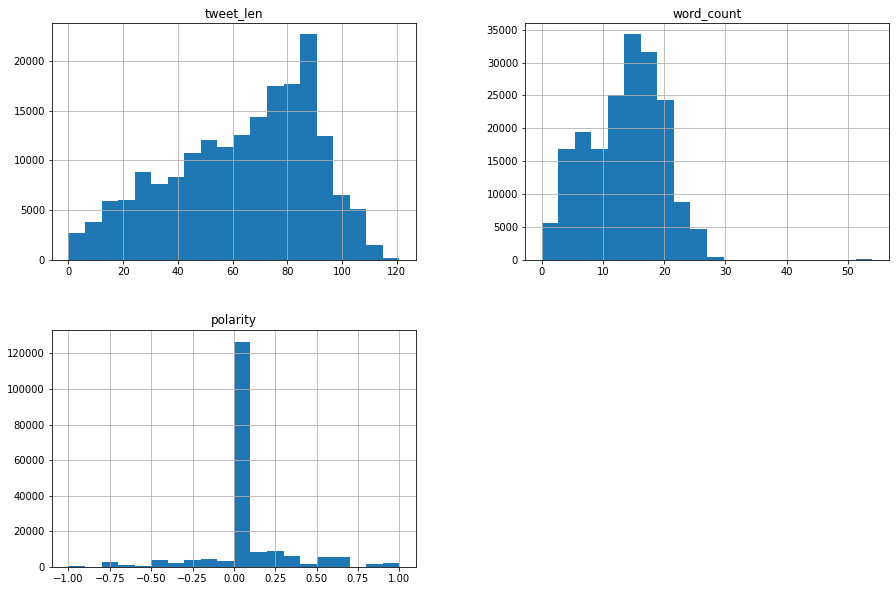

In [35]:
df[["tweet_len", "word_count", "polarity"]].hist(bins=20, figsize=(15, 10))

In [36]:
cleantext = " ".join(cleaned for cleaned in df.cleaned)

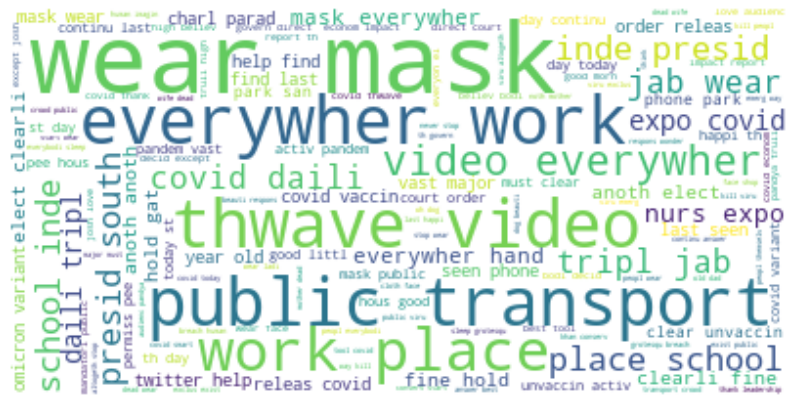

In [37]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords = stopwords.union(["ha", "thi", "now", "onli", "im", "becaus", "wa", "will", "even", "go", "realli", "didnt", "abl"])
wordcl = WordCloud(stopwords = stopwords, background_color='white', max_font_size = 50, max_words = 5000).generate(cleantext)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['cleaned'], 20)
df1 = pd.DataFrame(common_words, columns = ['cleaned', 'count'])
df1

,cleaned,count
0,covid,33724
1,wear,18515
2,peopl,16462
3,mask,14739
4,vaccin,9813
5,omicron,9037
6,public,8057
7,work,7622
8,variant,7115
9,becaus,6948


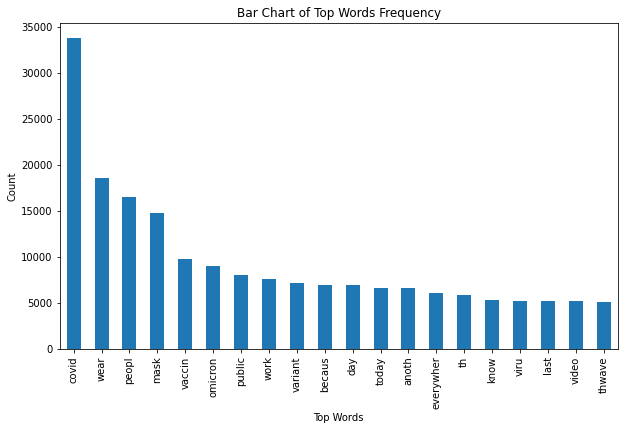

In [39]:
df1.groupby('cleaned').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency"
)

In [40]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(df['cleaned'], 30)
df2 = pd.DataFrame(common_words2, columns=['cleaned', "Count"])
df2.head()

,cleaned,Count
0,wear mask,8673
1,public transport,3090
2,everywher work,3051
3,thwave video,3050
4,video everywher,3050


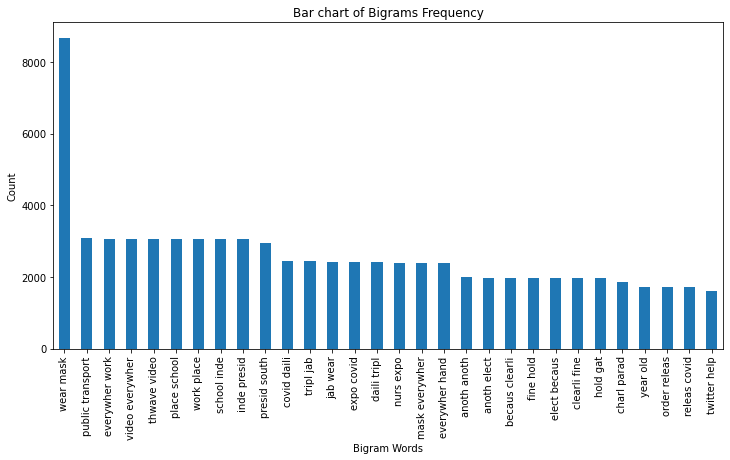

In [41]:
df2.groupby('cleaned').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Bigram Words",
    ylabel = "Count",
    title = "Bar chart of Bigrams Frequency"
)

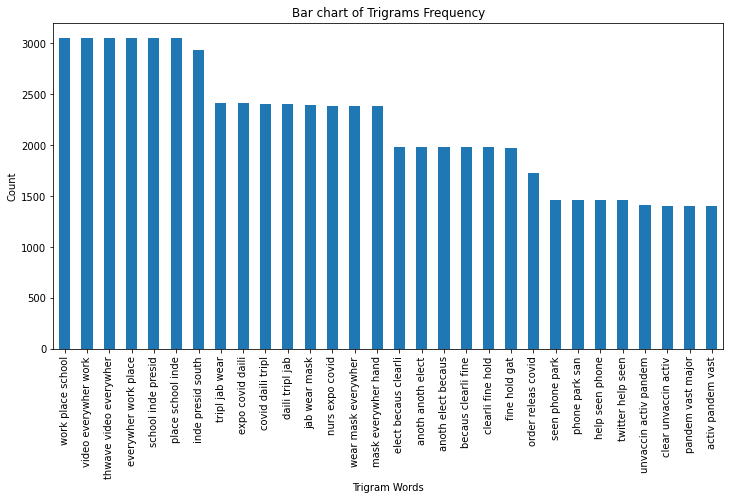

In [42]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words3 = get_top_n_trigram(df['cleaned'], 30)
df3 = pd.DataFrame(common_words3, columns = ['cleaned' , 'Count'])
df3.groupby('cleaned').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Trigram Words",
    ylabel = "Count",
    title = "Bar chart of Trigrams Frequency"
)

In [43]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

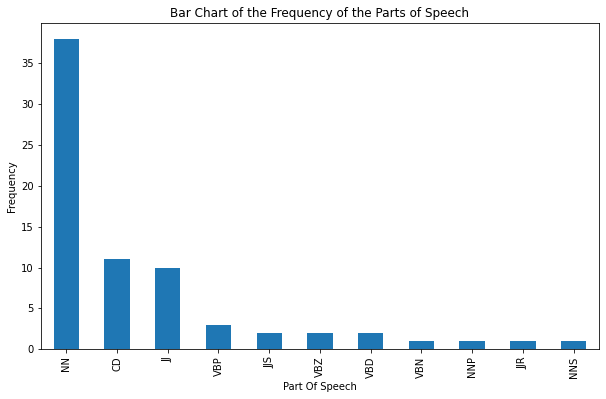

In [44]:
blob = TextBlob(str(df['cleaned']))
pos_df = pd.DataFrame(blob.tags, columns = ['word', 'pos'])
pos_df = pos_df.pos.value_counts()[:30]
pos_df.plot(kind='bar',
            xlabel = "Part Of Speech",
           ylabel = "Frequency",
           title = "Bar Chart of the Frequency of the Parts of Speech",
           figsize=(10, 6))

In [45]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])



In [46]:
# Lemmatization with stopwords removal
df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [47]:
df_grouped=df[['cleaned','lemmatized']].groupby(by='cleaned').agg(lambda x:' '.join(x))
df_grouped.head()

,lemmatized
cleaned,
,...
aa flight attend nose wear mask properli talk,aa flight attend nose wear mask properli talk
aba seed modern seed card,aba seed modern seed card
abandon disregard test trace,abandon disregard test trace
abandon disregard test trace scho,abandon disregard test trace scho abandon disr...


In [48]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

,aa,aapkaapnag,aarsbl,ab,aba,abandon,abawu,abba,abbey,abbi,abbrevi,abhor,abhorr,abid,abigail,abil,abject,abl,abnorm,abolish,aborigin,abort,abound,abov,abracadabra,abroad,abscond,absenc,absent,absente,absolut,absolv,absorb,abst,abstain,abstin,abstract,absurd,abu,abund,...,youv,yow,yr,yrsold,yuh,yummi,yusk,yydom,yyedom,za,zahra,zain,zar,zebra,zee,zenith,zer,zero,zeta,zftw,zib,zig,zimbabw,zinc,zink,zip,zo,zodiac,zombi,zone,zoo,zoom,zoon,zoonot,zucchini,ευρώ,シンデレラ周年,千葉day,𝗖𝗢𝗩𝗜𝗗𝗩𝗮𝗰𝗰𝗶𝗻𝗲,𝗦𝘁𝗲𝗽𝗣𝗹𝗮𝗻𝗳𝗼𝗿𝗥𝗲𝘁𝗶𝗿𝗲𝗺𝗲𝗻𝘁
cleaned,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aa flight attend nose wear mask properli talk,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aba seed modern seed card,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
from textblob import TextBlob
df['polarity']=df['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [50]:
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['cleaned']):
  print('Review {}:\n'.format(index+1),review)

Review 1:
 toward month end perfect time spoil snack
Review 2:
 best happi healthi thanksgiv thanksgiv covid
Review 3:
 empow best learn experi platform click know


In [51]:
print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:3].index]['cleaned']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Lowest Polarity:
Review 1:
 canada evil everyth fault advertis vaccin program yea
Review 2:
 canada evil everyth fault advertis vaccin program yea
Review 3:
 canada evil everyth fault advertis vaccin program yea


In [52]:
df['word_count'] = df['lemmatized'].apply(lambda x: len(str(x).split()))
df

,Clean_Tweet,cleaned,tweet_len,word_count,polarity,lemmatized
0,Doing work 👍❤️ covid pandemic,work covid pandem,20,3,0.000000,work covid pandem
1,": Get , it ’ s our best shot for a strong heal...",best shot strong healthi commun,50,5,0.566667,good shoot strong healthi commun
2,": Get , it ’ s our best shot for a strong heal...",best shot strong healthi commun,50,5,0.566667,good shoot strong healthi commun
3,Travel worry - free by a test today . Contact ...,travel worri free test today contact u,46,7,0.400000,travel worri free test today contact u
4,Do you want to know more about the Covid test ...,want know covid test offer check,71,6,0.000000,want know covid test offer check
...,...,...,...,...,...,...
187833,Thank you all for the contest . Watch this spa...,thank contest watch space plenti line,81,6,0.000000,thank contest watch space plenti line
187834,": One man , one team . one vision . . Delighte...",man team vision delight part bigger,77,5,0.000000,man team vision delight big
187835,: Yesterday was a Great kick - off : DaysOfAct...,yesterday great kick daysofactiv h e ambassador,67,7,0.800000,yesterday great kick daysofactiv h e ambassador
187836,: ! That ’ s just straight - up impressive for...,straight impress baba stadium deb,58,5,0.200000,straight impress baba stadium deb


In [53]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(cleaned):
    return TextBlob(cleaned).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(cleaned):
        return TextBlob(cleaned).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [54]:
fin_data = pd.DataFrame(df[['cleaned', 'lemmatized']])

In [55]:
df['Subjectivity'] = df['lemmatized'].apply(getSubjectivity) 
df['Polarity'] = df['lemmatized'].apply(getPolarity) 
df['Analysis'] = df['Polarity'].apply(analysis)
df.head()

,Clean_Tweet,cleaned,tweet_len,word_count,polarity,lemmatized,Subjectivity,Polarity,Analysis
0,Doing work 👍❤️ covid pandemic,work covid pandem,20,3,0.000000,work covid pandem,0.000000,0.000000,Neutral
1,": Get , it ’ s our best shot for a strong heal...",best shot strong healthi commun,50,5,0.566667,good shoot strong healthi commun,0.666667,0.566667,Positive
2,": Get , it ’ s our best shot for a strong heal...",best shot strong healthi commun,50,5,0.566667,good shoot strong healthi commun,0.666667,0.566667,Positive
3,Travel worry - free by a test today . Contact ...,travel worri free test today contact u,46,7,0.400000,travel worri free test today contact u,0.800000,0.400000,Positive
4,Do you want to know more about the Covid test ...,want know covid test offer check,71,6,0.000000,want know covid test offer check,0.000000,0.000000,Neutral


In [56]:
tb_counts = df.Analysis.value_counts()

tb_counts

Neutral     123681
Positive     43278
Negative     20879
Name: Analysis, dtype: int64

In [57]:
conditions = [
    (df['Analysis'] == 'Neutral'),
    (df['Analysis'] == 'Positive'),
    (df['Analysis'] == 'Negative')
    ]

# create a list of the values we want to assign for each condition
values = [0, 1,-1]

# create a new column and use np.select to assign values to it using our lists as arguments
df['sentiment'] = np.select(conditions, values)

# display updated DataFrame
df

,Clean_Tweet,cleaned,tweet_len,word_count,polarity,lemmatized,Subjectivity,Polarity,Analysis,sentiment
0,Doing work 👍❤️ covid pandemic,work covid pandem,20,3,0.000000,work covid pandem,0.000000,0.000000,Neutral,0
1,": Get , it ’ s our best shot for a strong heal...",best shot strong healthi commun,50,5,0.566667,good shoot strong healthi commun,0.666667,0.566667,Positive,1
2,": Get , it ’ s our best shot for a strong heal...",best shot strong healthi commun,50,5,0.566667,good shoot strong healthi commun,0.666667,0.566667,Positive,1
3,Travel worry - free by a test today . Contact ...,travel worri free test today contact u,46,7,0.400000,travel worri free test today contact u,0.800000,0.400000,Positive,1
4,Do you want to know more about the Covid test ...,want know covid test offer check,71,6,0.000000,want know covid test offer check,0.000000,0.000000,Neutral,0
...,...,...,...,...,...,...,...,...,...,...
187833,Thank you all for the contest . Watch this spa...,thank contest watch space plenti line,81,6,0.000000,thank contest watch space plenti line,0.000000,0.000000,Neutral,0
187834,": One man , one team . one vision . . Delighte...",man team vision delight part bigger,77,5,0.000000,man team vision delight big,0.100000,0.000000,Neutral,0
187835,: Yesterday was a Great kick - off : DaysOfAct...,yesterday great kick daysofactiv h e ambassador,67,7,0.800000,yesterday great kick daysofactiv h e ambassador,0.750000,0.800000,Positive,1
187836,: ! That ’ s just straight - up impressive for...,straight impress baba stadium deb,58,5,0.200000,straight impress baba stadium deb,0.400000,0.200000,Positive,1


In [58]:
from sklearn.model_selection import train_test_split
tweets = df['cleaned'].values
labels = df['sentiment'].values
tweets_train, tweets_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.2, random_state=1000)

In [59]:
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import string
punctuations = string.punctuation
parser = English()
stopwords = list(STOP_WORDS)
def spacy_tokenizer(utterance):
      tokens = parser(utterance)
      return [token.lemma_.lower().strip() for token in tokens if token.text.lower().strip() not in stopwords and token.text not in punctuations]

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
#By default, the vectorizer might be created as follows:
#vectorizer = CountVectorizer()
vectorizer.fit(tweets_train)

CountVectorizer(tokenizer=<function spacy_tokenizer at 0x7f63d921def0>)

In [61]:
X_train = vectorizer.transform(tweets_train)
X_test = vectorizer.transform(tweets_test)

In [62]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [63]:
accuracy = classifier.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9951288330494037


In [64]:
new_reviews = ['Old version of python useless', 'Very good effort, but not five stars', 'Clear and concise']
X_new = vectorizer.transform(new_reviews)
classifier.predict(X_new)

array([-1,  1,  1])

In [65]:
from bertopic import BERTopic
